In [ ]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
df_og = pd.read_csv('/content/drive/MyDrive/cjs/0527 df_for_nlp.csv')

In [ ]:
df_og.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df = df_og.copy()

In [ ]:
df.head(2)

,month,title,text,token,new_token,hangul,up_down
0,201101,"소득 안늘고 집값은 비싸 “뾰족수 없네”,전세대란에 서민들 눈앞이 깜깜한데…'전세금...",[한겨레] [2011년 경제 전망] 부동산시장 침체 벗어날까\n\n부양정책 펴도 반...,"['한겨레/Noun', '경제/Noun', '전망/Noun', '부동산/Noun',...",한겨레/Noun 경제/Noun 전망/Noun 부동산/Noun 시장/Noun 침체/N...,한겨레 경제 전망 부동산 시장 침체 벗어나다 부양 정책 펴다 반짝 경기 가능성 셋값...,1
1,201102,"미분양 아파트 61% 중대형,전세가 고공행진에 지방 아파트 매매가도 `꿈틀`,미분양...",전국 미분양 아파트가 감소하는 추세지만 전용면적 85㎡를 초과 하는 중대형 비중은 ...,"['전국/Noun', '미분/Noun', '아파트/Noun', '감소/Noun', ...",전국/Noun 미분/Noun 아파트/Noun 감소/Noun 하다/Verb 추세/No...,전국 미분 아파트 감소 하다 추세 전용 면적 를 초과 하다 중대 비중 오히려 커지다...,1


In [ ]:
df['d2v_input'] = [s.split(" ") for s in df['hangul']]

In [ ]:
doc_df = df[['d2v_input','title']].values.tolist()

In [ ]:
len(df['d2v_input'][0])

115728

In [ ]:
len(df.loc[0,'d2v_input'])

115728

In [ ]:
doc_df[0]

[['한겨레',
  '경제',
  '전망',
  '부동산',
  '시장',
  '침체',
  '벗어나다',
  '부양',
  '정책',
  '펴다',
  '반짝',
  '경기',
  '가능성',
  '셋값',
  '수급',
  '불균형',
  '고공',
  '행진',
  '부동산',
  '시장',
  '장기',
  '침체',
  '벗어나다',
  '수',
  '있다',
  '부동산',
  '가격',
  '놓다',
  '바닥',
  '론',
  '과',
  '대세',
  '하락',
  '론',
  '논쟁',
  '지속',
  '되다',
  '있다',
  '가운데',
  '새해',
  '부동산',
  '시장',
  '어떻다',
  '흘러가다',
  '관심',
  '쏠리다',
  '있다',
  '대체로',
  '전문가',
  '사이',
  '새해',
  '아파트',
  '비롯',
  '택시',
  '침체',
  '그늘',
  '여전하다',
  '것',
  '보다',
  '시각',
  '우세하다',
  '가계',
  '소득',
  '늘',
  '않다',
  '집값',
  '여전하다',
  '높다',
  '상황',
  '빚',
  '얻다',
  '주택',
  '구입',
  '하다',
  '수요',
  '늘어나다',
  '데',
  '한계',
  '있다',
  '때문',
  '그동안',
  '왕성',
  '주택',
  '소비',
  '행태',
  '보이다',
  '베이비붐',
  '세대',
  '가다',
  '본격',
  '은퇴',
  '시기',
  '맞다',
  '있다',
  '점도',
  '대세',
  '하락',
  '론',
  '뒷받침',
  '있다',
  '침체',
  '미리',
  '택지',
  '확보',
  '하다',
  '못',
  '건설',
  '사',
  '신규',
  '주택',
  '급량',
  '새해',
  '감소',
  '세다',
  '기존',
  '재고',
  '택시',
  '나오다',
  '매물',
  '많다',
  '전체',
  '수급',
  

In [ ]:
tagged_data = [TaggedDocument(words= word, tags=[str(title)]) for word, title in doc_df]

In [ ]:
tagged_data[0]

TaggedDocument(words=['한겨레', '경제', '전망', '부동산', '시장', '침체', '벗어나다', '부양', '정책', '펴다', '반짝', '경기', '가능성', '셋값', '수급', '불균형', '고공', '행진', '부동산', '시장', '장기', '침체', '벗어나다', '수', '있다', '부동산', '가격', '놓다', '바닥', '론', '과', '대세', '하락', '론', '논쟁', '지속', '되다', '있다', '가운데', '새해', '부동산', '시장', '어떻다', '흘러가다', '관심', '쏠리다', '있다', '대체로', '전문가', '사이', '새해', '아파트', '비롯', '택시', '침체', '그늘', '여전하다', '것', '보다', '시각', '우세하다', '가계', '소득', '늘', '않다', '집값', '여전하다', '높다', '상황', '빚', '얻다', '주택', '구입', '하다', '수요', '늘어나다', '데', '한계', '있다', '때문', '그동안', '왕성', '주택', '소비', '행태', '보이다', '베이비붐', '세대', '가다', '본격', '은퇴', '시기', '맞다', '있다', '점도', '대세', '하락', '론', '뒷받침', '있다', '침체', '미리', '택지', '확보', '하다', '못', '건설', '사', '신규', '주택', '급량', '새해', '감소', '세다', '기존', '재고', '택시', '나오다', '매물', '많다', '전체', '수급', '측면', '공급', '초과', '현상', '지속', '되다', '것', '예상', '되다', '기적', '정부', '대적', '부동산', '경기', '부양', '조처', '따르다', '반짝', '경기', '가다', '나타나다', '것', '전망', '있다', '무엇', '국토해양부', '최근', '업무', '계획', '통해', '밝히다', '민간', '택지', '분양', '상한', '제', '폐지

In [ ]:
len(tagged_data)

120

In [ ]:
# 각 월별 기사 중 Token 개수 최대, 최소 확인 => doc2vec 모델 훈련 시 window size 참고용
news_length = [len(news) for news in df['d2v_input']]
print(max(news_length), min(news_length))

351429 50778


In [ ]:
Doc2Vec_model = Doc2Vec(window = 100, vector_size=100, min_count=1)

In [ ]:
Doc2Vec_model.build_vocab(tagged_data)

In [ ]:
# Doc2Vec 훈련
Doc2Vec_model.train(tagged_data, total_examples=len(tagged_data), epochs=50)

In [ ]:
#벡터 확인 
print(len(Doc2Vec_model.docvecs))
print(Doc2Vec_model.docvecs[0])

120
[ -2.6774383   -6.2623615   -7.5464334   -8.892809    -3.471561
   9.282585     3.2748203   19.790995     5.6652617   -1.8741928
  10.995851    -2.2622755   -4.87635      3.3637471  -11.933368
 -21.697414   -12.650939    -7.1561813    2.2057161    8.655712
  12.797187     9.553703    15.122894   -12.69922      8.487306
  22.682978   -15.027435    -7.5197897   -6.2371683   -0.7767951
   8.389361   -10.4134245    3.174621    -3.0176291    1.1606653
  -2.9456296   -1.7075689    1.0671239  -19.01299      6.1982656
   0.98562825 -16.251322    14.6029415   14.241063    11.706789
   0.10858214   1.5008649   24.513643    -9.711877    -5.0118647
 -15.838555     8.851461   -17.067211    14.706187   -17.547867
  -3.8088694   -3.4050927  -11.588783     6.7567816   -2.7584734
   4.775943    29.124775    23.81132    -12.057885   -11.185198
 -10.0637455    8.432768    16.672134    -2.628697    -6.8391724
  14.473695    19.20439    -29.40902     -0.6812009    7.279704
  -1.4834462   -8.386255     

In [ ]:
# 모델 저장
Doc2Vec_model.save("0531_hong_d2v_hangul_ws100_vs100.model")
!cp d2v_hangul_size50.model '/content/drive/MyDrive/w2v_colab/'
## Load saved doc2vec model
# Doc2Vec_model= Doc2Vec.load("/content/drive/MyDrive/w2v_colab/d2v_hangul_size50.model")

cp: failed to access '/content/drive/MyDrive/w2v_colab/': Not a directory


In [ ]:
#각 월의 벡터들을 데이터 프레임 형태로 변환
vectorized = []
for i in range(120):
    vectorized.append(Doc2Vec_model.docvecs[i])
vectorized_df = pd.DataFrame(vectorized)

In [ ]:
vectorized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-2.677438,-6.262362,-7.546433,-8.892809,-3.471561,9.282585,3.274820,19.790995,5.665262,-1.874193,10.995851,-2.262275,-4.876350,3.363747,-11.933368,-21.697414,-12.650939,-7.156181,2.205716,8.655712,12.797187,9.553703,15.122894,-12.699220,8.487306,22.682978,-15.027435,-7.519790,-6.237168,-0.776795,8.389361,-10.413424,3.174621,-3.017629,1.160665,-2.945630,-1.707569,1.067124,-19.012991,6.198266,...,4.775943,29.124775,23.811319,-12.057885,-11.185198,-10.063745,8.432768,16.672134,-2.628697,-6.839172,14.473695,19.204390,-29.409019,-0.681201,7.279704,-1.483446,-8.386255,6.243927,-1.868995,26.935852,22.196175,8.895856,-23.766563,21.066210,0.930920,-14.763673,19.393883,-20.207859,-2.434681,7.357318,14.648917,16.540871,-2.249428,-9.571145,-5.398775,-8.622885,-15.797408,1.367108,1.147759,24.606701
1,-1.819857,-1.441522,-14.426203,-5.715602,-3.021615,25.483824,-6.523331,3.514452,21.504545,-7.864505,-1.048423,-5.970902,-20.696709,6.464642,-6.243064,-29.211666,-8.963538,3.287877,2.839433,-1.460238,11.668976,20.563717,23.442141,-13.064457,3.296228,11.364665,-15.703518,-6.195426,-2.662364,8.292092,4.748957,3.595040,9.848760,-12.851174,-11.330663,-8.799572,12.517840,7.063276,-9.290934,10.378069,...,7.083966,39.684227,4.345078,-3.466618,-5.519175,-10.063027,15.043669,-8.645245,17.486956,-0.769542,18.392170,13.898066,-24.545708,5.004722,-2.541063,7.002632,8.411087,-8.251996,-9.615989,36.643414,10.186140,8.170845,-38.316921,24.289698,4.300943,-1.090613,14.526661,-10.687674,11.434524,6.722807,20.793581,10.161504,8.255033,-8.496225,0.595765,-20.974422,-9.302201,-1.258532,13.460788,16.507513
2,-13.737320,-17.507380,-19.174244,2.615881,5.536227,5.572473,-0.233833,12.678844,10.429733,-6.849106,-8.369547,-4.287551,0.560326,19.103642,-2.605724,-21.273262,-8.905271,-4.447654,-3.977367,-1.751969,7.007342,-4.567589,14.163821,-2.003643,7.357066,25.669956,-16.292070,10.660176,-0.721547,3.502493,6.725357,8.195923,8.290831,-3.221674,-10.927918,-2.721111,11.117870,19.879229,-15.437134,12.491007,...,3.562690,31.308451,15.800406,-4.467121,-6.920722,-1.933243,3.115081,4.631054,4.957583,-11.043849,8.170094,17.512823,-10.919073,-2.152880,6.420138,3.687066,14.251218,-3.960210,-15.950766,31.536547,2.199274,4.657957,-18.706820,34.338402,6.642396,-4.826200,7.354614,-13.297402,-7.509420,3.408535,14.078517,11.258575,5.247632,-12.306933,3.043876,1.769852,-5.449244,-9.709488,10.305906,19.396709
3,-3.778958,-11.390806,-9.283602,0.415733,7.994739,0.498478,-0.996705,28.591337,11.980021,-9.347001,-0.377138,10.651937,-6.815686,19.158344,-13.919156,-20.848434,-14.677139,-8.093322,-16.009600,0.105086,-1.937348,14.476197,7.863988,-7.330099,-0.483877,25.351919,-6.612534,-4.345046,0.637808,-1.105496,2.170998,1.234540,-3.115391,-1.916221,2.593703,3.865213,19.210863,20.753508,-25.051859,18.445744,...,3.321221,34.980339,18.794069,-13.531602,7.499918,-8.414940,-7.174691,7.427005,9.508639,0.947427,8.797553,7.761334,-25.080664,13.425938,9.216707,-5.759808,9.819063,11.369632,0.041951,20.744457,13.605770,-6.184311,-17.719728,30.714598,3.452960,-11.080762,12.862388,-12.450247,19.271124,-0.282739,3.841299,-0.628047,15.895352,-3.847216,8.097983,-1.397556,-10.964464,1.341491,9.496196,16.925920
4,-18.636076,-31.899118,-9.307713,6.882718,-4.240748,13.208859,-3.725346,17.187735,-1.166849,1.155218,-8.180269,-5.009719,-5.154831,5.388247,-22.270393,-29.460211,-0.892277,-2.875948,-13.352647,1.261135,11.357665,5.545229,20.318335,-7.543702,5.600535,10.405659,-18.789864,5.042485,3.323647,-7.993824,-5.233007,0.112963,4.557539,2.974784,-1.620565,-10.668004,12.726053,12.013109,-32.566959,29.892155,...,10.101777,29.696123,8.298141,-14.877337,-7.370135,-1.536431,3.901147,16.465832,11.553813,-7.464013,12.443216,15.513922,-30.645060,-9.730073,-7.288627,-6.654328,5.381721,4.955526,

In [ ]:
vectorized_df.to_csv('0531_d2v_ws100_vs100_df.csv')
!cp 0531_d2v_ws100_vs100_df.csv '/content/drive/MyDrive/w2v_colab'

#load vectors
#vectorized_df = pd.read_csv('/content/drive/MyDrive/w2v_colab/d2v_hangul_size50_vector.csv')

# Random Forest

In [ ]:
vectorized_df = pd.read_csv('/content/drive/MyDrive/cjs/0531_d2v_ws100_vs100_df.csv')
vectorized_df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [ ]:
vectorized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-2.677438,-6.262362,-7.546433,-8.892809,-3.471561,9.282585,3.274820,19.790995,5.665262,-1.874193,10.995851,-2.262275,-4.876350,3.363747,-11.933368,-21.697414,-12.650939,-7.156181,2.205716,8.655712,12.797187,9.553703,15.122894,-12.699220,8.487306,22.682978,-15.027435,-7.519790,-6.237168,-0.776795,8.389361,-10.413424,3.174621,-3.017629,1.160665,-2.945630,-1.707569,1.067124,-19.012991,6.198266,...,4.775943,29.124775,23.811319,-12.057885,-11.185198,-10.063745,8.432768,16.672134,-2.628697,-6.839172,14.473695,19.204390,-29.409019,-0.681201,7.279704,-1.483446,-8.386255,6.243927,-1.868995,26.935852,22.196175,8.895856,-23.766563,21.066210,0.930920,-14.763673,19.393883,-20.207859,-2.434681,7.357318,14.648917,16.540871,-2.249428,-9.571145,-5.398775,-8.622885,-15.797408,1.367108,1.147759,24.606701
1,-1.819857,-1.441522,-14.426203,-5.715602,-3.021615,25.483824,-6.523331,3.514452,21.504545,-7.864505,-1.048423,-5.970902,-20.696709,6.464642,-6.243064,-29.211666,-8.963538,3.287877,2.839433,-1.460238,11.668976,20.563717,23.442141,-13.064457,3.296228,11.364665,-15.703518,-6.195426,-2.662364,8.292092,4.748957,3.595040,9.848760,-12.851174,-11.330663,-8.799572,12.517840,7.063276,-9.290934,10.378069,...,7.083966,39.684227,4.345078,-3.466618,-5.519175,-10.063027,15.043669,-8.645245,17.486956,-0.769542,18.392170,13.898066,-24.545708,5.004722,-2.541063,7.002632,8.411087,-8.251996,-9.615989,36.643414,10.186140,8.170845,-38.316921,24.289698,4.300943,-1.090613,14.526661,-10.687674,11.434524,6.722807,20.793581,10.161504,8.255033,-8.496225,0.595765,-20.974422,-9.302201,-1.258532,13.460788,16.507513
2,-13.737320,-17.507380,-19.174244,2.615881,5.536227,5.572473,-0.233833,12.678844,10.429733,-6.849106,-8.369547,-4.287551,0.560326,19.103642,-2.605724,-21.273262,-8.905271,-4.447654,-3.977367,-1.751969,7.007342,-4.567589,14.163821,-2.003643,7.357066,25.669956,-16.292070,10.660176,-0.721547,3.502493,6.725357,8.195923,8.290831,-3.221674,-10.927918,-2.721111,11.117870,19.879229,-15.437134,12.491007,...,3.562690,31.308451,15.800406,-4.467121,-6.920722,-1.933243,3.115081,4.631054,4.957583,-11.043849,8.170094,17.512823,-10.919073,-2.152880,6.420138,3.687066,14.251218,-3.960210,-15.950766,31.536547,2.199274,4.657957,-18.706820,34.338402,6.642396,-4.826200,7.354614,-13.297402,-7.509420,3.408535,14.078517,11.258575,5.247632,-12.306933,3.043876,1.769852,-5.449244,-9.709488,10.305906,19.396709
3,-3.778958,-11.390806,-9.283602,0.415733,7.994739,0.498478,-0.996705,28.591337,11.980021,-9.347001,-0.377138,10.651937,-6.815686,19.158344,-13.919156,-20.848434,-14.677139,-8.093322,-16.009600,0.105086,-1.937348,14.476197,7.863988,-7.330099,-0.483877,25.351919,-6.612534,-4.345046,0.637808,-1.105496,2.170998,1.234540,-3.115391,-1.916221,2.593703,3.865213,19.210863,20.753508,-25.051859,18.445744,...,3.321221,34.980339,18.794069,-13.531602,7.499918,-8.414940,-7.174691,7.427005,9.508639,0.947427,8.797553,7.761334,-25.080664,13.425938,9.216707,-5.759808,9.819063,11.369632,0.041951,20.744457,13.605770,-6.184311,-17.719728,30.714598,3.452960,-11.080762,12.862388,-12.450247,19.271124,-0.282739,3.841299,-0.628047,15.895352,-3.847216,8.097983,-1.397556,-10.964464,1.341491,9.496196,16.925920
4,-18.636076,-31.899118,-9.307713,6.882718,-4.240748,13.208859,-3.725346,17.187735,-1.166849,1.155218,-8.180269,-5.009719,-5.154831,5.388247,-22.270393,-29.460211,-0.892277,-2.875948,-13.352647,1.261135,11.357665,5.545229,20.318335,-7.543702,5.600535,10.405659,-18.789864,5.042485,3.323647,-7.993824,-5.233007,0.112963,4.557539,2.974784,-1.620565,-10.668004,12.726053,12.013109,-32.566959,29.892155,...,10.101777,29.696123,8.298141,-14.877337,-7.370135,-1.536431,3.901147,16.465832,11.553813,-7.464013,12.443216,15.513922,-30.645060,-9.730073,-7.288627,-6.654328,5.381721,4.955526,

In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/cjs/분석용데이터_utf_spi수정완료.csv')

In [ ]:
temp.head(3)

,Date,M2,comp basemoney rate,base rate,consumer price index,kospi close,ex-rate close,효준감성점수,spi
0,201101월,1676.4,4.52,2.75,3.4,2069.73,1119.25,1856.746125,81.3
1,201102월,1674.4,4.72,2.75,3.9,1939.30,1124.65,2046.702906,82.5
2,201103월,1677.5,4.54,3.00,4.1,2106.70,1095.50,1715.795289,83.4


In [ ]:
spi_df = temp['spi']

In [ ]:
whole_data = pd.concat([vectorized_df, spi_df], axis = 1)

In [ ]:
whole_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,spi
0,-2.677438,-6.262362,-7.546433,-8.892809,-3.471561,9.282585,3.274820,19.790995,5.665262,-1.874193,10.995851,-2.262275,-4.876350,3.363747,-11.933368,-21.697414,-12.650939,-7.156181,2.205716,8.655712,12.797187,9.553703,15.122894,-12.699220,8.487306,22.682978,-15.027435,-7.519790,-6.237168,-0.776795,8.389361,-10.413424,3.174621,-3.017629,1.160665,-2.945630,-1.707569,1.067124,-19.012991,6.198266,...,29.124775,23.811319,-12.057885,-11.185198,-10.063745,8.432768,16.672134,-2.628697,-6.839172,14.473695,19.204390,-29.409019,-0.681201,7.279704,-1.483446,-8.386255,6.243927,-1.868995,26.935852,22.196175,8.895856,-23.766563,21.066210,0.930920,-14.763673,19.393883,-20.207859,-2.434681,7.357318,14.648917,16.540871,-2.249428,-9.571145,-5.398775,-8.622885,-15.797408,1.367108,1.147759,24.606701,81.3
1,-1.819857,-1.441522,-14.426203,-5.715602,-3.021615,25.483824,-6.523331,3.514452,21.504545,-7.864505,-1.048423,-5.970902,-20.696709,6.464642,-6.243064,-29.211666,-8.963538,3.287877,2.839433,-1.460238,11.668976,20.563717,23.442141,-13.064457,3.296228,11.364665,-15.703518,-6.195426,-2.662364,8.292092,4.748957,3.595040,9.848760,-12.851174,-11.330663,-8.799572,12.517840,7.063276,-9.290934,10.378069,...,39.684227,4.345078,-3.466618,-5.519175,-10.063027,15.043669,-8.645245,17.486956,-0.769542,18.392170,13.898066,-24.545708,5.004722,-2.541063,7.002632,8.411087,-8.251996,-9.615989,36.643414,10.186140,8.170845,-38.316921,24.289698,4.300943,-1.090613,14.526661,-10.687674,11.434524,6.722807,20.793581,10.161504,8.255033,-8.496225,0.595765,-20.974422,-9.302201,-1.258532,13.460788,16.507513,82.5
2,-13.737320,-17.507380,-19.174244,2.615881,5.536227,5.572473,-0.233833,12.678844,10.429733,-6.849106,-8.369547,-4.287551,0.560326,19.103642,-2.605724,-21.273262,-8.905271,-4.447654,-3.977367,-1.751969,7.007342,-4.567589,14.163821,-2.003643,7.357066,25.669956,-16.292070,10.660176,-0.721547,3.502493,6.725357,8.195923,8.290831,-3.221674,-10.927918,-2.721111,11.117870,19.879229,-15.437134,12.491007,...,31.308451,15.800406,-4.467121,-6.920722,-1.933243,3.115081,4.631054,4.957583,-11.043849,8.170094,17.512823,-10.919073,-2.152880,6.420138,3.687066,14.251218,-3.960210,-15.950766,31.536547,2.199274,4.657957,-18.706820,34.338402,6.642396,-4.826200,7.354614,-13.297402,-7.509420,3.408535,14.078517,11.258575,5.247632,-12.306933,3.043876,1.769852,-5.449244,-9.709488,10.305906,19.396709,83.4
3,-3.778958,-11.390806,-9.283602,0.415733,7.994739,0.498478,-0.996705,28.591337,11.980021,-9.347001,-0.377138,10.651937,-6.815686,19.158344,-13.919156,-20.848434,-14.677139,-8.093322,-16.009600,0.105086,-1.937348,14.476197,7.863988,-7.330099,-0.483877,25.351919,-6.612534,-4.345046,0.637808,-1.105496,2.170998,1.234540,-3.115391,-1.916221,2.593703,3.865213,19.210863,20.753508,-25.051859,18.445744,...,34.980339,18.794069,-13.531602,7.499918,-8.414940,-7.174691,7.427005,9.508639,0.947427,8.797553,7.761334,-25.080664,13.425938,9.216707,-5.759808,9.819063,11.369632,0.041951,20.744457,13.605770,-6.184311,-17.719728,30.714598,3.452960,-11.080762,12.862388,-12.450247,19.271124,-0.282739,3.841299,-0.628047,15.895352,-3.847216,8.097983,-1.397556,-10.964464,1.341491,9.496196,16.925920,83.9
4,-18.636076,-31.899118,-9.307713,6.882718,-4.240748,13.208859,-3.725346,17.187735,-1.166849,1.155218,-8.180269,-5.009719,-5.154831,5.388247,-22.270393,-29.460211,-0.892277,-2.875948,-13.352647,1.261135,11.357665,5.545229,20.318335,-7.543702,5.600535,10.405659,-18.789864,5.042485,3.323647,-7.993824,-5.233007,0.112963,4.557539,2.974784,-1.620565,-10.668004,12.726053,12.013109,-32.566959,29.892155,...,29.696123,8.298141,-14.877337,-7.370135,-1.536431,3.901147,16.465832,11.553813,-7.464013,12.443216,15.513922,-30.645060,-9.730073,-7.288627,-6.654328,5.381721,4.955526,-1.041233,18.877827,12.98

## Random Forest 모델링

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
train = whole_data[:90]
test = whole_data[90:]
X_train = train.drop(['spi'], axis = 1)
X_test = test.drop(['spi'], axis = 1)
y_train = train['spi']
y_test = test['spi']

In [ ]:
rfc = RandomForestRegressor(random_state = 42)
param_grid = { 
    'n_estimators': [150,200,250,300,350,400,450,500],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4,6,8,10,12,14,16,18,20],
}

In [ ]:

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit = True, scoring = 'neg_mean_squared_error')
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 10, 'min_samples_split': 16, 'n_estimators': 500}


In [ ]:
y_pred = CV_rfc.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5

In [ ]:
RMSE

14.723728935673638

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 89.90358944023203 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 91.72521120771661 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 91.60783323641813 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 91.61427233

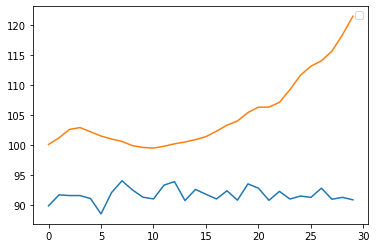

In [ ]:
from matplotlib import pyplot as plt

plt.plot(y_pred)
plt.plot(list(y_test))
plt.legend(['Prediction','Actual'])

# Random Forest : Train_Test_Shuffle

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = whole_data.drop(['spi'], axis = 1)
y = whole_data['spi']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 1002)

In [ ]:
rfc = RandomForestRegressor(random_state = 42)
param_grid = { 
    'n_estimators': [150,200,250,300,350,400,450,500],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4,6,8,10,12,14,16,18,20],
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit = True, scoring = 'neg_mean_squared_error')
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 400}


In [ ]:
y_pred = CV_rfc.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(RMSE)

8.428474769723575


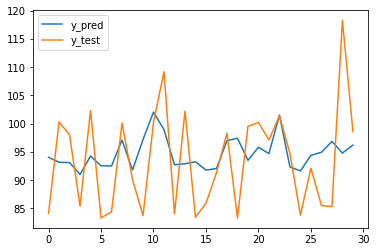

In [ ]:
from matplotlib import pyplot as plt

plt.plot(y_pred)
plt.plot(list(y_test))
plt.legend(['y_pred','y_test'])

# Regression 말고 Classification 도전

In [ ]:
temp2 = pd.read_csv('/content/drive/MyDrive/cjs/0527 df_for_nlp.csv')

In [ ]:
updown = temp2['up_down']

In [ ]:
cf_df = pd.concat([vectorized_df,updown], axis = 1)

In [ ]:
cf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,up_down
0,-2.677438,-6.262362,-7.546433,-8.892809,-3.471561,9.282585,3.274820,19.790995,5.665262,-1.874193,10.995851,-2.262275,-4.876350,3.363747,-11.933368,-21.697414,-12.650939,-7.156181,2.205716,8.655712,12.797187,9.553703,15.122894,-12.699220,8.487306,22.682978,-15.027435,-7.519790,-6.237168,-0.776795,8.389361,-10.413424,3.174621,-3.017629,1.160665,-2.945630,-1.707569,1.067124,-19.012991,6.198266,...,29.124775,23.811319,-12.057885,-11.185198,-10.063745,8.432768,16.672134,-2.628697,-6.839172,14.473695,19.204390,-29.409019,-0.681201,7.279704,-1.483446,-8.386255,6.243927,-1.868995,26.935852,22.196175,8.895856,-23.766563,21.066210,0.930920,-14.763673,19.393883,-20.207859,-2.434681,7.357318,14.648917,16.540871,-2.249428,-9.571145,-5.398775,-8.622885,-15.797408,1.367108,1.147759,24.606701,1
1,-1.819857,-1.441522,-14.426203,-5.715602,-3.021615,25.483824,-6.523331,3.514452,21.504545,-7.864505,-1.048423,-5.970902,-20.696709,6.464642,-6.243064,-29.211666,-8.963538,3.287877,2.839433,-1.460238,11.668976,20.563717,23.442141,-13.064457,3.296228,11.364665,-15.703518,-6.195426,-2.662364,8.292092,4.748957,3.595040,9.848760,-12.851174,-11.330663,-8.799572,12.517840,7.063276,-9.290934,10.378069,...,39.684227,4.345078,-3.466618,-5.519175,-10.063027,15.043669,-8.645245,17.486956,-0.769542,18.392170,13.898066,-24.545708,5.004722,-2.541063,7.002632,8.411087,-8.251996,-9.615989,36.643414,10.186140,8.170845,-38.316921,24.289698,4.300943,-1.090613,14.526661,-10.687674,11.434524,6.722807,20.793581,10.161504,8.255033,-8.496225,0.595765,-20.974422,-9.302201,-1.258532,13.460788,16.507513,1
2,-13.737320,-17.507380,-19.174244,2.615881,5.536227,5.572473,-0.233833,12.678844,10.429733,-6.849106,-8.369547,-4.287551,0.560326,19.103642,-2.605724,-21.273262,-8.905271,-4.447654,-3.977367,-1.751969,7.007342,-4.567589,14.163821,-2.003643,7.357066,25.669956,-16.292070,10.660176,-0.721547,3.502493,6.725357,8.195923,8.290831,-3.221674,-10.927918,-2.721111,11.117870,19.879229,-15.437134,12.491007,...,31.308451,15.800406,-4.467121,-6.920722,-1.933243,3.115081,4.631054,4.957583,-11.043849,8.170094,17.512823,-10.919073,-2.152880,6.420138,3.687066,14.251218,-3.960210,-15.950766,31.536547,2.199274,4.657957,-18.706820,34.338402,6.642396,-4.826200,7.354614,-13.297402,-7.509420,3.408535,14.078517,11.258575,5.247632,-12.306933,3.043876,1.769852,-5.449244,-9.709488,10.305906,19.396709,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
param_grid = { 
    'n_estimators': [150,200,250,300,350,400,450,500],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4,6,8,10,12,14,16,18,20],
}

In [ ]:
train = cf_df[:90]
test = cf_df[90:]
X_train = train.drop('up_down',axis = 1)
X_test = test.drop('up_down',axis = 1)
y_train = train['up_down']
y_test = test['up_down']

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit = True)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
y_pred = CV_rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("auc: ", roc_auc_score(y_test,y_pred))